In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [10]:
def f(x):
    return 2.0*np.sin(np.pi*x)

def g(x):
    return -1.0*np.sin(2*np.pi*x)

def u_exact(x,t):
    return 2.0*np.sin(np.pi*x)*np.cos(np.pi*t) - 1.0/(2*np.pi)*np.sin(2*np.pi*x)*np.sin(2*np.pi*t)

3.35
3.3
3.31
3.305

Rates of convergence:  [ 1.83623798  2.03179278  1.98337049]

Errors:  [  2.14264574e-03   3.98325230e-04   9.74108297e-05   2.46350377e-05]

Rates of convergence:  [ 2.99763113  2.99629601  2.99978642]

Errors:  [  8.18417846e-04   5.24925577e-05   6.57843760e-06   8.22426447e-07]


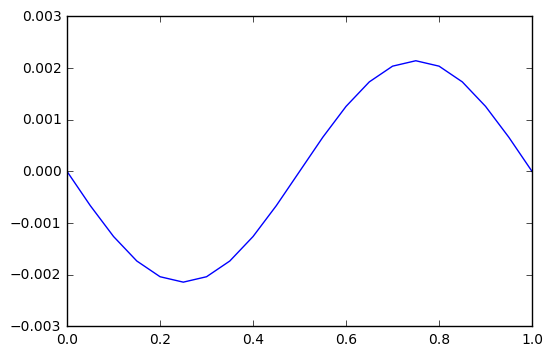

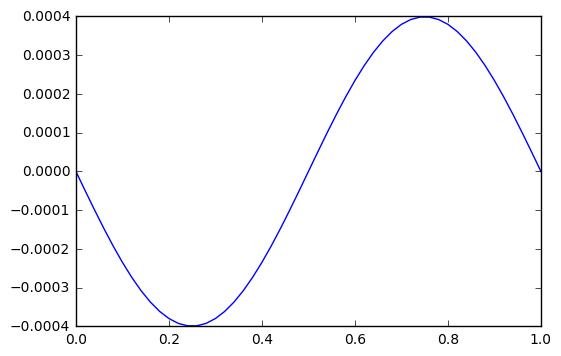

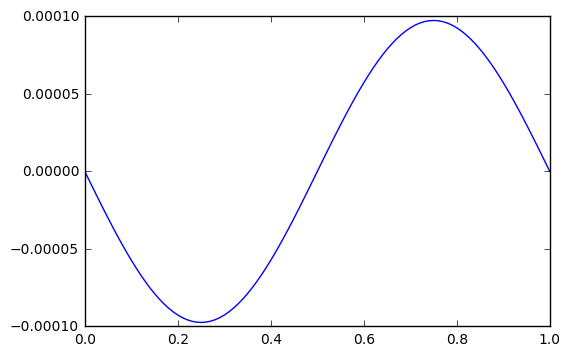

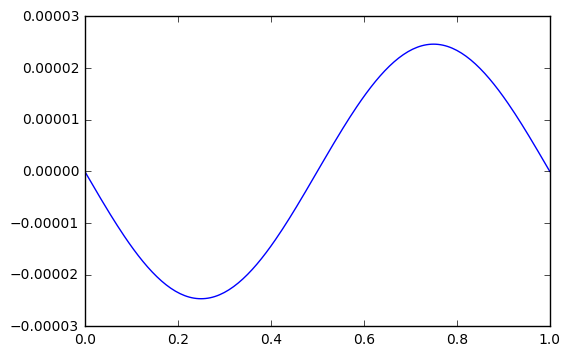

In [47]:
# Define an explicit method

n_s = [19, 49, 99, 199]
errors = np.zeros(4)
errors2 = np.zeros(4)
dt_s = np.zeros(4)
dx_s = np.zeros(4)
count = 0

for n in n_s:
    
    plt.figure(count)
    
    x = np.linspace(0,1,n+2)
    dx = x[1]-x[0]
    dx_s[count] = dx
    
    A = np.zeros((n,n))
    np.fill_diagonal(A,2)
    A += np.diag(-np.ones(n-1),k=1)
    A += np.diag(-np.ones(n-1),k=-1)    
    A *= 1.0/dx**2

    r = 1.0
    dt = r*dx
    dt_s[count] = dt
    
   
    v_old = np.copy(f(x))
    v_current = np.copy(f(x))
    v_current[1:-1] = v_old[1:-1] + dt*g(x[1:-1]) - dt**2/2*np.dot(A,v_old[1:-1])
    
    errors2[count] = np.max(np.abs(v_current - u_exact(x,dt)))
    
    v_new = 0*x
    
    t = 1.0*dt #<----- start at 1*dt

    B = 2.0*np.eye(n)-dt**2*A
    
    time_iter = 0
    while t<3.3:
        v_new[1:-1] = np.dot(B,v_current[1:-1]) - v_old[1:-1] # <--------- v_{m+1} is now computed
        v_old = np.copy(v_current)
        v_current = np.copy(v_new)
        t += dt # <-------------- now go to t_{m+1}
        time_iter += 1
    print t    
    errors[count] = np.max(np.abs(v_new-u_exact(x,t)))
    
    plt.plot(x, v_new-u_exact(x,t))
            
    count += 1
    
print
alpha = np.log(errors[1:]/errors[0:-1])/np.log(dt_s[1:]/dt_s[0:-1])
print 'Rates of convergence: ', alpha
print
print 'Errors: ', errors

print
alpha = np.log(errors2[1:]/errors2[0:-1])/np.log(dt_s[1:]/dt_s[0:-1])
print 'Rates of convergence: ', alpha
print
print 'Errors: ', errors2

3.35
3.3
3.31
3.305

Rates of convergence:  [ 1.92362199  1.78583946  1.98003069]

Errors:  [ 0.18266398  0.03134489  0.00909024  0.00230424]


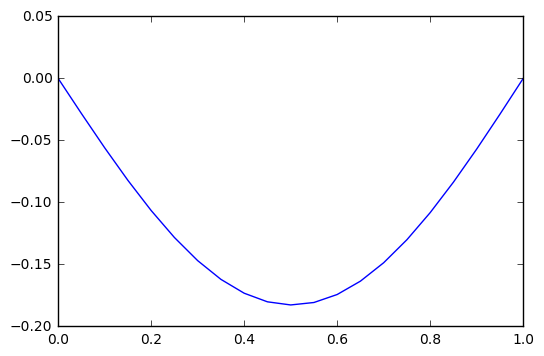

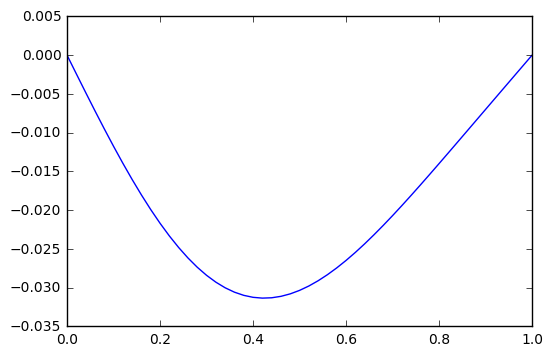

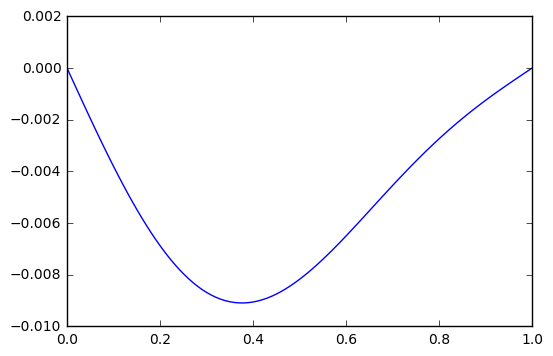

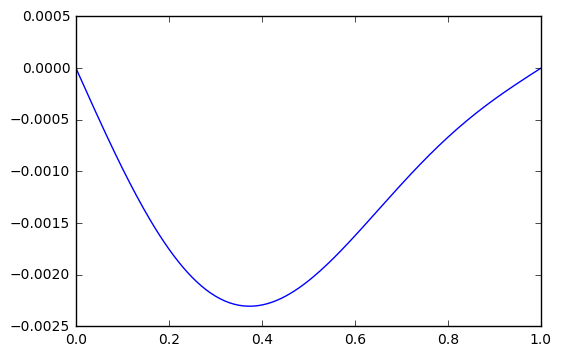

In [44]:
# Define an explicit method

n_s = [19, 49, 99, 199]
errors = np.zeros(4)
dt_s = np.zeros(4)
dx_s = np.zeros(4)
count = 0

for n in n_s:
    
    plt.figure(count)
    
    x = np.linspace(0,1,n+2)
    dx = x[1]-x[0]
    dx_s[count] = dx
    
    A = np.zeros((n,n))
    np.fill_diagonal(A,2)
    A += np.diag(-np.ones(n-1),k=1)
    A += np.diag(-np.ones(n-1),k=-1)    
    A *= 1.0/dx**2

    r = 1.0
    dt = r*dx
    dt_s[count] = dt
    
    v_old_2 = np.copy(f(x))
    v_old_1 = np.copy(u_exact(x,dt))
    v_current = np.copy(u_exact(x,2*dt))
    
    v_new = 0*x
    
    t = 1.0*dt #<----- start at 1*dt

    B = np.linalg.inv(2*np.eye(n)+dt**2*A)
    
    time_iter = 0
    while t<3.3:
        v_new[1:-1] = np.dot(B, 5.0*v_current[1:-1] - 4.0*v_old_1[1:-1] + v_old_2[1:-1])# <--------- v_{m+1} is now computed
        v_old_2 = np.copy(v_old_1)
        v_old_1 = np.copy(v_current)
        v_current = np.copy(v_new)
        t += dt # <-------------- now go to t_{m+1}
        time_iter += 1
    print t    
    errors[count] = np.max(np.abs(v_new-u_exact(x,t)))
    
    plt.plot(x, v_new-u_exact(x,t))
            
    count += 1
    
print
alpha = np.log(errors[1:]/errors[0:-1])/np.log(dt_s[1:]/dt_s[0:-1])
print 'Rates of convergence: ', alpha
print
print 'Errors: ', errors
